<a href="https://colab.research.google.com/github/cuongdaoo/A-B-Testing-for-Email-Engagement/blob/main/A_B_testing_email_marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import random
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import shapiro


#Introduction

This project focuses on conducting an **A/B Testing experiment in an email marketing campaign** to evaluate the effectiveness of two different email subject lines in attracting user engagement.

The campaign was split into two groups:

* **Subject Line A**: *"Exclusive offer just for you today!"*
* **Subject Line B**: *"We have a special gift for you 🎁"*

Each subject line was tested on a randomly selected subset of recipients. The goal is to determine **which subject line is more compelling and drives better user interaction**, measured through:

* **Open Rate** – whether the subject line encourages recipients to open the email.
* **Click-Through Rate (CTR)** – whether recipients engage with content inside the email.
* **Conversion Rate (CR)** – whether users ultimately take the desired action (e.g., making a purchase or filling out a form).

By applying statistical analysis, this A/B test aims to identify whether **Subject Line A or B is significantly more effective** in influencing user behavior. The results will guide future marketing strategies and subject line optimization.


#Data Description

In [ ]:
df=pd.read_csv('/content/email_marketing_ab_test_v2.csv')
df.head()

,Email ID,Campaign Name,Subject Line,Date Sent,Delivered,Opened,Clicked,Bounced,Marked Spam,Unsubscribed,Replied,Converted,Conversion Target,Device,Open Time,Location
0,A001,A,Exclusive offer just for you today!,6/1/2025,True,True,True,False,False,False,False,True,Purchase,Desktop,6/1/2025 21:50,Ho Chi Minh City
1,A002,A,Exclusive offer just for you today!,6/1/2025,True,False,False,False,False,False,False,False,Purchase,Mobile,NaN,Hanoi
2,A003,A,Exclusive offer just for you today!,6/1/2025,True,True,False,False,False,False,False,False,Purchase,Mobile,6/1/2025 3:49,Hanoi
3,A004,A,Exclusive offer just for you today!,6/1/2025,True,True,True,False,False,False,False,True,Purchase,Desktop,6/1/2025 0:52,Hanoi
4,A005,A,Exclusive offer just for you today!,6/1/2025,True,True,True,False,False,False,False,True,Purchase,Mobile,6/1/2025 9:24,Hanoi




1. **Email ID**: Unique identifier for each email sent.
2. **Campaign Name**: Experimental group (A or B) used for A/B testing.
3. **Subject Line**: The subject line of the email (used to test audience engagement.).
4. **Sent Time**: The timestamp when the email was sent.
5. **Delivered**: Indicates whether the email was successfully delivered to the recipient.
6. **Opened**: Indicates whether the recipient opened the email.
7. **Clicked**: Indicates whether the recipient clicked on any link inside the email.
8. **Bounced**: Indicates whether the email failed to be delivered (hard or soft bounce).
9. **Marked Spam**: Indicates whether the recipient marked the email as spam.
10. **Unsubscribed**: Indicates whether the recipient unsubscribed from future emails.
11. **Replied**: Indicates whether the recipient replied to the email.
12. **Converted**: Indicates whether the recipient performed the desired conversion action (e.g., purchase, signup).
13. **Conversion Target**: The specific goal of the campaign — e.g., `Purchase`, `Signup`, `Download`, etc.
14. **Device**: The device type used to open the email (e.g., `Mobile`, `Desktop`, `Tablet`).
15. **Open Time**: Timestamp of when the email was opened (if applicable).
16. **Location**: The city or region inferred from IP or user profile (e.g., `Hanoi`, `Ho Chi Minh City`, etc.).  

In [ ]:
df.shape

(400, 16)

In [ ]:
df.dtypes

,0
Email ID,object
Campaign Name,object
Subject Line,object
Date Sent,object
Delivered,bool
Opened,bool
Clicked,bool
Bounced,bool
Marked Spam,bool
Unsubscribed,bool


In [ ]:
#convert "Sent Time" to date type
df['Date Sent'] = pd.to_datetime(df['Date Sent'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Email ID           400 non-null    object        
 1   Campaign Name      400 non-null    object        
 2   Subject Line       400 non-null    object        
 3   Date Sent          400 non-null    datetime64[ns]
 4   Delivered          400 non-null    bool          
 5   Opened             400 non-null    bool          
 6   Clicked            400 non-null    bool          
 7   Bounced            400 non-null    bool          
 8   Marked Spam        400 non-null    bool          
 9   Unsubscribed       400 non-null    bool          
 10  Replied            400 non-null    bool          
 11  Converted          400 non-null    bool          
 12  Conversion Target  400 non-null    object        
 13  Device             400 non-null    object        
 14  Open Time 

#Data Processing

In [ ]:
# List of columns to convert
bool_cols = ['Delivered', 'Opened', 'Clicked', 'Bounced', 'Marked Spam', 'Unsubscribed', 'Replied', 'Converted']

# Convert boolean columns to integers
for col in bool_cols:
    df[col] = df[col].astype(int)

df.head()

,Email ID,Campaign Name,Subject Line,Date Sent,Delivered,Opened,Clicked,Bounced,Marked Spam,Unsubscribed,Replied,Converted,Conversion Target,Device,Open Time,Location
0,A001,A,Exclusive offer just for you today!,6/1/2025,1,1,1,0,0,0,0,1,Purchase,Desktop,6/1/2025 21:50,Ho Chi Minh City
1,A002,A,Exclusive offer just for you today!,6/1/2025,1,0,0,0,0,0,0,0,Purchase,Mobile,NaN,Hanoi
2,A003,A,Exclusive offer just for you today!,6/1/2025,1,1,0,0,0,0,0,0,Purchase,Mobile,6/1/2025 3:49,Hanoi
3,A004,A,Exclusive offer just for you today!,6/1/2025,1,1,1,0,0,0,0,1,Purchase,Desktop,6/1/2025 0:52,Hanoi
4,A005,A,Exclusive offer just for you today!,6/1/2025,1,1,1,0,0,0,0,1,Purchase,Mobile,6/1/2025 9:24,Hanoi


In [ ]:
df.describe()

,Date Sent,Delivered,Opened,Clicked,Bounced,Marked Spam,Unsubscribed,Replied,Converted
count,400,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,2025-06-01 00:00:00,0.952500,0.730000,0.29250,0.047500,0.017500,0.032500,0.132500,0.135000
min,2025-06-01 00:00:00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2025-06-01 00:00:00,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2025-06-01 00:00:00,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2025-06-01 00:00:00,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2025-06-01 00:00:00,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
std,NaN,0.212972,0.444515,0.45548,0.212972,0.131289,0.177546,0.339458,0.342152


#Comparing Campaigns performance

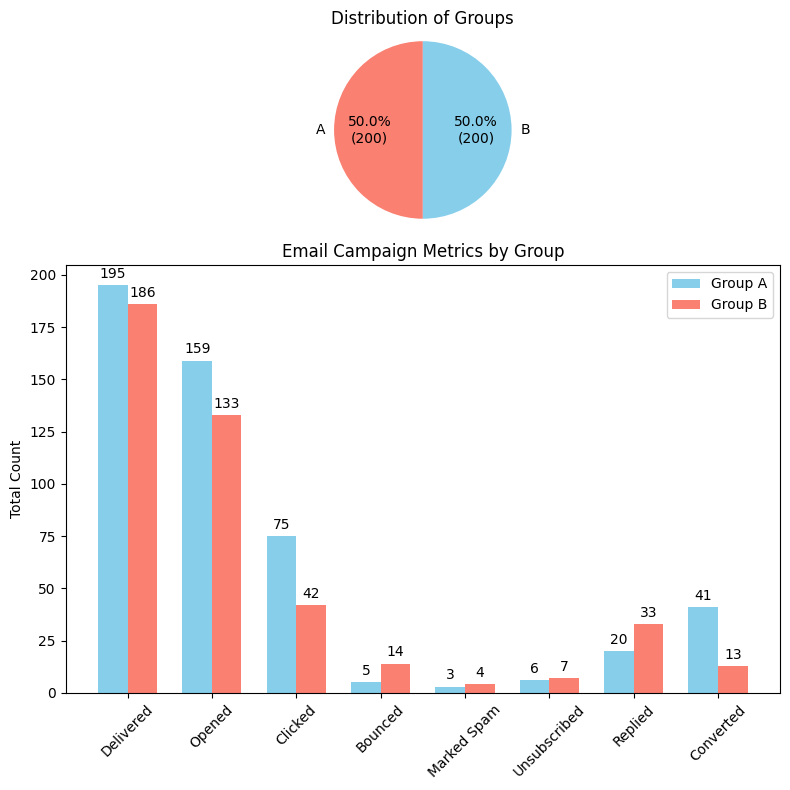

In [ ]:
# 1. Pie Chart - Distribution of Groups
group_counts = df['Campaign Name'].value_counts()

# 2. Metrics cho Bar Chart
metrics = ['Delivered', 'Opened', 'Clicked', 'Bounced',
           'Marked Spam', 'Unsubscribed', 'Replied', 'Converted']
group_stats = df.groupby('Campaign Name')[metrics].sum().T  # transpose


fig = plt.figure(figsize=(8,8))

# --- Pie chart (subplot 1) ---
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=1)
ax1.pie(group_counts, labels=group_counts.index,
        autopct=lambda p: f'{p:.1f}%\n({int(round(p*sum(group_counts)/100))})',
        startangle=90, colors=['salmon', 'skyblue'])
ax1.set_title('Distribution of Groups')
ax1.axis('equal')

# --- Bar chart (subplot 2) ---
ax2 = plt.subplot2grid((3, 1), (1, 0), rowspan=2)
x = np.arange(len(metrics))
width = 0.35

bars1 = ax2.bar(x - width/2, group_stats['A'], width, label='Group A', color='skyblue')
bars2 = ax2.bar(x + width/2, group_stats['B'], width, label='Group B', color='salmon')

ax2.set_ylabel('Total Count')
ax2.set_title('Email Campaign Metrics by Group')
ax2.set_xticks(x)
ax2.set_xticklabels(metrics, rotation=45)
ax2.legend()

# Ghi số trên cột
def annotate_bars(bars):
    for bar in bars:
        height = bar.get_height()
        ax2.annotate(f'{int(height)}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom')

annotate_bars(bars1)
annotate_bars(bars2)

plt.tight_layout()
plt.show()

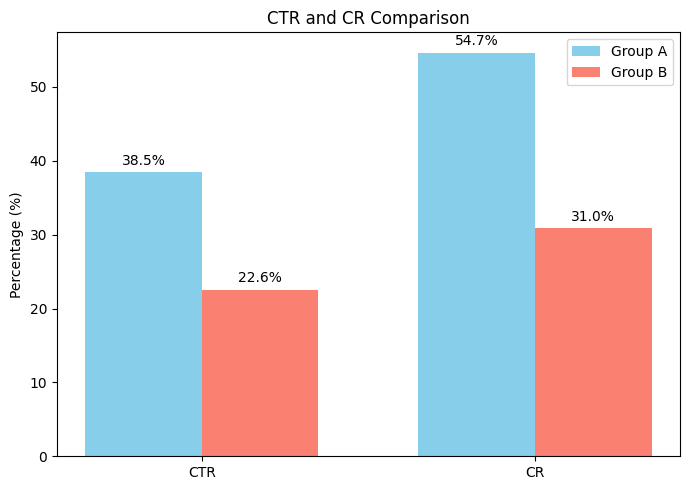

In [ ]:
# Tính CTR và CR cho từng group
summary = df.groupby('Campaign Name').agg(
    Delivered=('Delivered', 'sum'),
    Clicked=('Clicked', 'sum'),
    Converted=('Converted', 'sum')
).reset_index()

summary['CTR'] = (summary['Clicked'] / summary['Delivered']) * 100
summary['CR'] = (summary['Converted'] / summary['Clicked'].replace(0, pd.NA)) * 100

# Tạo dữ liệu theo dạng Group x Metric
metrics = ['CTR', 'CR']
x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(7, 5))

# Lấy giá trị của từng nhóm
group_a_values = summary[summary['Campaign Name'] == 'A'][metrics].values.flatten()
group_b_values = summary[summary['Campaign Name'] == 'B'][metrics].values.flatten()

# Vẽ cột
bars_a = ax.bar(x - width/2, group_a_values, width, label='Group A', color='skyblue')
bars_b = ax.bar(x + width/2, group_b_values, width, label='Group B', color='salmon')

# Cấu hình biểu đồ
ax.set_ylabel('Percentage (%)')
ax.set_title('CTR and CR Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Ghi nhãn trên cột
def annotate_bars(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 3),
                    textcoords='offset points',
                    ha='center', va='bottom')

annotate_bars(bars_a)
annotate_bars(bars_b)

plt.tight_layout()
plt.show()

Group A and Group B have the same number: 200 emails each.
* This shows that the group division is random and even → ensuring fairness for A/B Testing.
---
Group A outperforms Group B in most important metrics: Open Rate, Click-Through Rate (CTR), Conversion Rate (CR)

* This shows that Subject Line A ("Exclusive offer just for you today!") can be **more attractive and convincin**g to users.

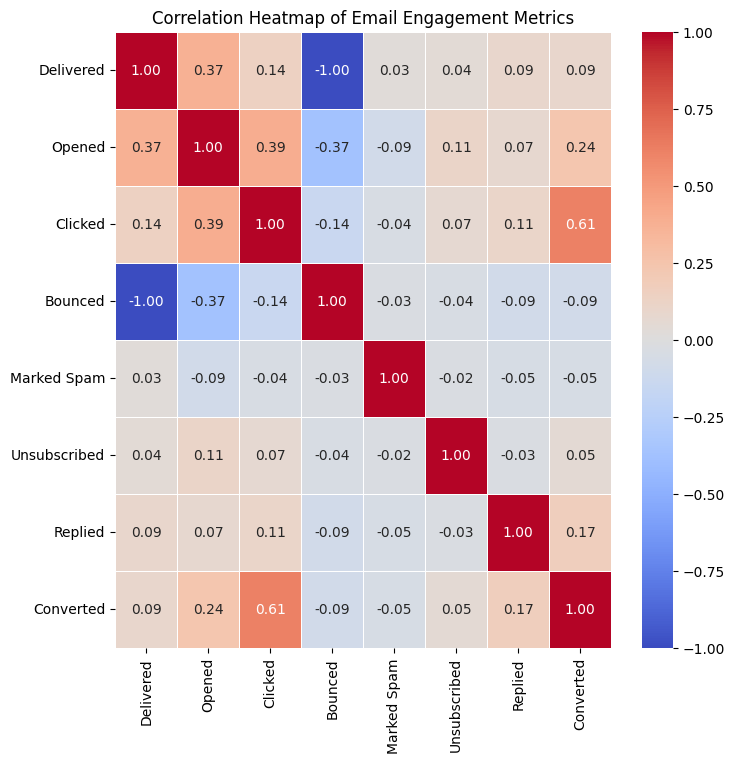

In [ ]:
cols = ['Delivered', 'Opened', 'Clicked', 'Bounced',
        'Marked Spam', 'Unsubscribed', 'Replied', 'Converted']

# Tính ma trận tương quan
correlation_matrix = df[cols].corr()

# Vẽ heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Email Engagement Metrics')
plt.show()

#Hypothesis Testing

🎯 **Testing Objective**

**To evaluate whether changing the email subject line makes the campaign more effective overall, in terms of Open Rate, CTR, and CR.**

> **Specifically: Is Subject Line A more engaging than Subject Line B?**

---

📊 **Hypothesis**

**Null Hypothesis (H₀):**

> There is no difference, or Subject Line A is not more engaging than Subject Line B
> **H₀: μₐ ≤ μᵦ**

**Alternative Hypothesis (H₁):**

> Subject Line A is more engaging than Subject Line B
> **H₁: μₐ > μᵦ**

📌 with:

* `μₐ`: Effectiveness metric (Open Rate / CTR / CR) of **Group A**
* `μᵦ`: Effectiveness metric of **Group B**



In [ ]:
from scipy.stats import mannwhitneyu, shapiro

In [ ]:
# Remove NaNs and filter data with Delivered > 0
df = df[df['Delivered'] > 0]
df = df.dropna(subset=['Clicked', 'Converted', 'Delivered'])

# Recalculate CR and CTR
df['CR'] = df['Converted'] / df['Clicked']
df['CTR'] = df['Clicked'] / df['Delivered']


# Check for uniqueness
print("Unique CR values:", df['CR'].unique())
print("Unique CTR values:", df['CTR'].unique())

# Filter by Group
cr_A = df[df['Campaign Name'] == 'A']['CR']
cr_B = df[df['Campaign Name'] == 'B']['CR']
ctr_A = df[df['Campaign Name'] == 'A']['CTR']
ctr_B = df[df['Campaign Name'] == 'B']['CTR']

# Only continue if there is more than 1 unique value
print("\nCR A:", cr_A.describe())
print("CR B:", cr_B.describe())
print("CTR A:", ctr_A.describe())
print("CTR B:", ctr_B.describe())


Unique CR values: [ 1. nan  0.]
Unique CTR values: [1. 0.]

CR A: count    75.000000
mean      0.546667
std       0.501170
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: CR, dtype: float64
CR B: count    42.000000
mean      0.309524
std       0.467901
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: CR, dtype: float64
CTR A: count    195.000000
mean       0.384615
std        0.487757
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: CTR, dtype: float64
CTR B: count    186.000000
mean       0.225806
std        0.419241
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: CTR, dtype: float64


##Residuals normality check

In [ ]:
# Tính Open Rate
df['OpenRate'] = df['Opened'] / df['Delivered']

# Kiểm tra loại bỏ NaN
df = df[df['Delivered'] > 0]
df = df.dropna(subset=['Opened', 'Delivered'])

# Tách dữ liệu theo nhóm
open_A = df[df['Campaign Name'] == 'A']['OpenRate']
open_B = df[df['Campaign Name'] == 'B']['OpenRate']

# Residuals check (optional)

stat_shapiro_A, p_shapiro_A = shapiro(open_A)
stat_shapiro_B, p_shapiro_B = shapiro(open_B)
print("🔍 Shapiro-Wilk Test for Open Rate residuals:")

print(f"OpenRate - Group A: W = {stat_shapiro_A:.4f}, p = {p_shapiro_A:.4f} → {'✅ Normal' if p_shapiro_A > 0.05 else '❌ Not normal'}")
print(f"OpenRate - Group B: W = {stat_shapiro_B:.4f}, p = {p_shapiro_B:.4f} → {'✅ Normal' if p_shapiro_B > 0.05 else '❌ Not normal'}\n")

🔍 Shapiro-Wilk Test for Open Rate residuals:
OpenRate - Group A: W = 0.4718, p = 0.0000 → ❌ Not normal
OpenRate - Group B: W = 0.5653, p = 0.0000 → ❌ Not normal



In [ ]:
# Tách theo nhóm và loại bỏ NaN
cr_A = df[df['Campaign Name'] == 'A']['CR'].dropna()
cr_B = df[df['Campaign Name'] == 'B']['CR'].dropna()
ctr_A = df[df['Campaign Name'] == 'A']['CTR'].dropna()
ctr_B = df[df['Campaign Name'] == 'B']['CTR'].dropna()

# 🔎 Shapiro-Wilk Test
print("🔍 Shapiro-Wilk Test for Normality (CR & CTR):\n")

# CR
stat_cr_A, p_cr_A = shapiro(cr_A)
stat_cr_B, p_cr_B = shapiro(cr_B)

print(f"CR - Group A: W = {stat_cr_A:.4f}, p = {p_cr_A:.4f} → {'✅ Normal' if p_cr_A > 0.05 else '❌ Not normal'}")
print(f"CR - Group B: W = {stat_cr_B:.4f}, p = {p_cr_B:.4f} → {'✅ Normal' if p_cr_B > 0.05 else '❌ Not normal'}\n")

# CTR
stat_ctr_A, p_ctr_A = shapiro(ctr_A)
stat_ctr_B, p_ctr_B = shapiro(ctr_B)

print(f"CTR - Group A: W = {stat_ctr_A:.4f}, p = {p_ctr_A:.4f} → {'✅ Normal' if p_ctr_A > 0.05 else '❌ Not normal'}")
print(f"CTR - Group B: W = {stat_ctr_B:.4f}, p = {p_ctr_B:.4f} → {'✅ Normal' if p_ctr_B > 0.05 else '❌ Not normal'}")


🔍 Shapiro-Wilk Test for Normality (CR & CTR):

CR - Group A: W = 0.6333, p = 0.0000 → ❌ Not normal
CR - Group B: W = 0.5822, p = 0.0000 → ❌ Not normal

CTR - Group A: W = 0.6168, p = 0.0000 → ❌ Not normal
CTR - Group B: W = 0.5163, p = 0.0000 → ❌ Not normal


Both Open rate, CR and CTR are not normally distributed, so you did the right thing by using a non-parametric test (Mann-Whitney U test) instead of a T-test.

##Mann Whitney U test

In [ ]:
# Mann-Whitney U test
u_stat, p_value = mannwhitneyu(open_A, open_B, alternative='greater')
print("\n🔎 Mann-Whitney U Test for Open Rate between Group A and B:")
print(f"U = {u_stat:.2f}, p = {p_value:.4f}")
print("✅ Open Rate of Group A is significantly greater than Group B" if p_value < 0.05 else "❌ No evidence that Open Rate of Group A > Group B.")


🔎 Mann-Whitney U Test for Open Rate between Group A and B:
U = 19954.50, p = 0.0104
✅ Open Rate of Group A is significantly greater than Group B


In [ ]:
# --- 2. Mann-Whitney U Test ---
print("\n🔎 Mann-Whitney U Test for CR and CTR (Group A vs B):")


# CR
u_cr, p_u_cr = mannwhitneyu(cr_A, cr_B, alternative='greater')
print(f"\nCR: U = {u_cr}, p = {p_u_cr:.4f}")
print("✅ CR of Group A is significantly greater than Group B." if p_u_cr < 0.05 else "❌ No evidence that CR of Group A > Group B.")

# CTR
u_ctr, p_u_ctr = mannwhitneyu(ctr_A, ctr_B, alternative='greater')
print(f"\nCTR: U = {u_ctr}, p = {p_u_ctr:.4f}")
print("✅ CTR of Group A is significantly greater than Group B." if p_u_ctr < 0.05 else "❌ No evidence that CTR of Group A > Group B.")


🔎 Mann-Whitney U Test for CR and CTR (Group A vs B):

CR: U = 1948.5, p = 0.0071
✅ CR of Group A is significantly greater than Group B.

CTR: U = 21015.0, p = 0.0004
✅ CTR of Group A is significantly greater than Group B.


p-value < 0.05: There is  enough statistical evidence to conclude that Group A is significantly greater than Group B in both Open rate, CR and CTR.

#🎯**Final Conclusion:**

> Based on the statistical test results (p-value < 0.05), **there is sufficient evidence to conclude that the email campaign with the subject line used in Group A performed significantly better than Group B** in terms of:

* **Open Rate**
* **Click-Through Rate (CTR)**
* **Conversion Rate (CR)**

💡 This suggests that the subject line used in Group A was more effective at **attracting attention, generating interest, and driving user actions** compared to Group B.
